## Heart Attack Analysis Prediction

Dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset <br>
Github: https://github.com/RanjeetKumbhar01/Heart-Attack-Analysis-Prediction

# Algorithms:
    1) Support Vector Classification:  0.8524590163934426
    2) Decision Tree Classifier:       0.8032786885245902
    3) Random Forest Classifier:       0.8032786885245902
    4) XGBClassifier:                  0.819672131147541
    5) Neural Network:                 0.9

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
print("The shape of the dataset is : ", df.shape)


The shape of the dataset is :  (303, 14)


In [6]:
dict = {}
for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"])

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
unique count,41,2,4,49,152,2,3,91,2,40,3,5,4,2


In [7]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall'] # Categorical Values
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]            # Continuous Values
target_col = ["output"]
print("The categorial cols are : ", cat_cols)
print("The continuous cols are : ", con_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [8]:
df[con_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df[cat_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
caa,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
slp,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0
thall,303.0,2.313531,0.612277,0.0,2.0,2.0,3.0,3.0


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

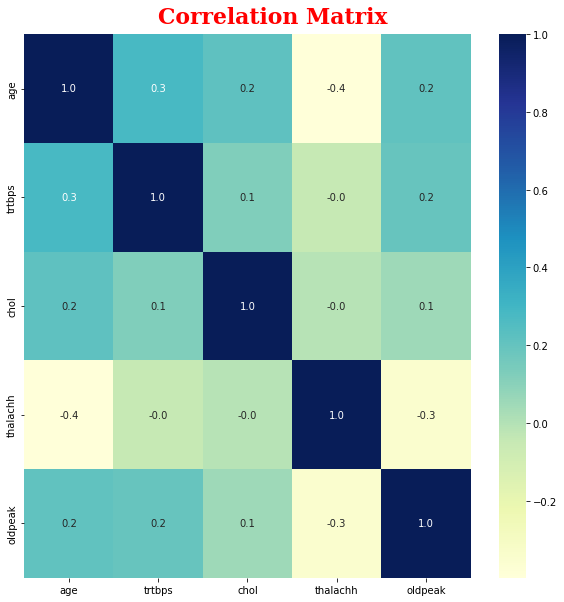

In [35]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

color_palette = ["blue","orange"]
ax0.text(1.5,-0.1,"Correlation Matrix",fontsize=22, fontweight='bold', fontfamily='serif', color="red")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

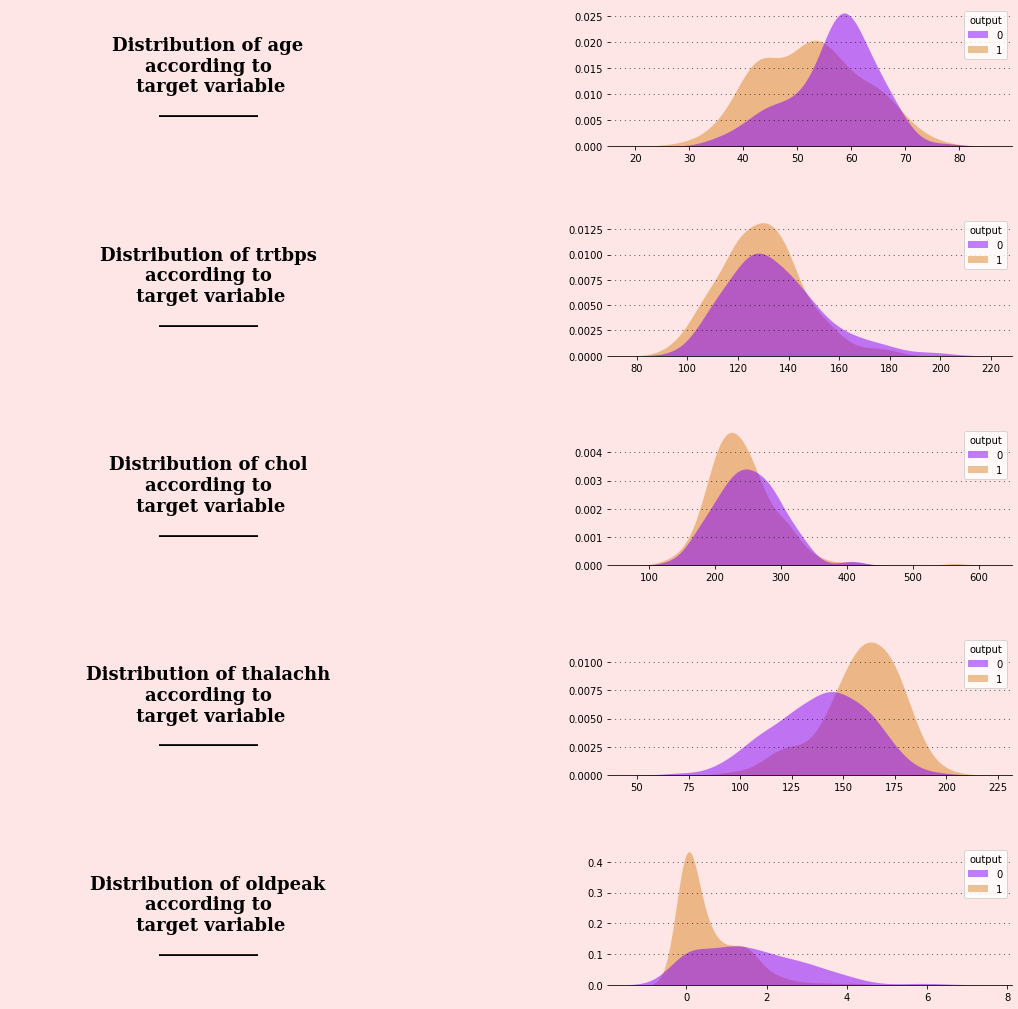

In [13]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distribution of age\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distribution of trtbps\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribution of chol\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribution of thalachh\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribution of oldpeak\naccording to\n target variable\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

In [14]:
# Scaling
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [15]:
# creating a copy of df
df1 = df

# define the columns to be encoded and scaled
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns

df1 = pd.get_dummies(df1, columns = cat_cols, drop_first = False)
df1

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,exng_0,exng_1,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,56,120,236,178,0.8,1,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,57,120,354,163,0.6,1,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1


In [16]:

# defining the features and target
X = df1.drop(['output'],axis=1)
y = df1[['output']]

# instantiating the scaler
scaler = RobustScaler()
# scaling the continuous featuree
X[con_cols] = scaler.fit_transform(X[con_cols])
print("The first 5 rows of X are")
X.head()

The first 5 rows of X are


,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,exng_0,exng_1,caa_0,...,restecg_0,restecg_1,restecg_2,slp_0,slp_1,slp_2,thall_0,thall_1,thall_2,thall_3
0,0.592593,0.75,-0.110236,-0.092308,0.9375,0,1,1,0,1,...,1,0,0,1,0,0,0,1,0,0
1,-1.333333,0.00,0.157480,1.046154,1.6875,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,0.074074,-0.50,-0.062992,0.769231,0.0000,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 88)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (242, 30)
The shape of X_test is        (61, 30)
The shape of y_train is       (242, 1)
The shape of y_test is        (61, 1)


In [18]:
# instantiating the object and fitting
clf = SVC(kernel='poly', C=1, random_state=42).fit(X_train,y_train)

# predicting the values
y_pred = clf.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM is ", accuracy_score(y_test, y_pred))

The test accuracy score of SVM is  0.8032786885245902


In [19]:
# instantiating the object
svm = SVC()

# setting a grid - not so extensive
parameters = {"C":np.arange(1,10,1),'gamma':[0.00001,0.00005, 0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1,5]}

# instantiating the GridSearchCV object
searcher = GridSearchCV(svm, parameters)

# fitting the object
searcher.fit(X_train, y_train)

# the scores
print("The best params are :", searcher.best_params_)
print("The best score is   :", searcher.best_score_)

# predicting the values
y_pred = searcher.predict(X_test)

# printing the test accuracy
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

The best params are : {'C': 8, 'gamma': 0.01}
The best score is   : 0.8428571428571429
The test accuracy score of SVM after hyper-parameter tuning is  0.8524590163934426


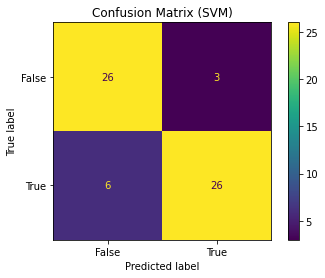

In [20]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred.round())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (SVM)")
plt.show()

The test accuracy score of Decision Tree is  0.8032786885245902


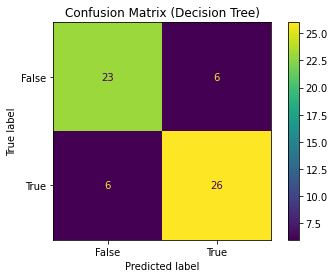

In [21]:
# instantiating the object
dt = DecisionTreeClassifier(random_state = 42)

# fitting the model
dt.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Decision Tree is ", accuracy_score(y_test, y_pred))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred.round())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (Decision Tree)")

plt.show()

The test accuracy score of Random Forest is  0.8032786885245902


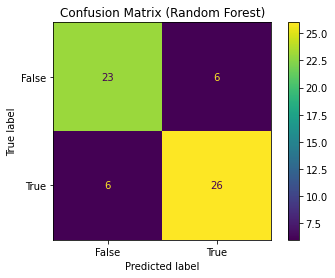

In [22]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
y_pred = dt.predict(X_test)

# printing the test accuracy
print("The test accuracy score of Random Forest is ", accuracy_score(y_test, y_pred))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred.round())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (Random Forest)")

plt.show()

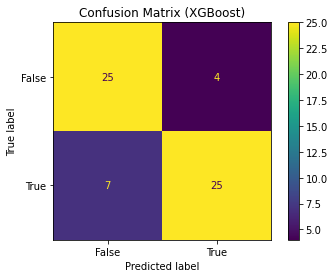

In [23]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier()
from sklearn.metrics import accuracy_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

confusion_matrix = metrics.confusion_matrix(y_test, preds.round())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (XGBoost)")

plt.show()

In [24]:
from tensorflow.keras import Model
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

model = Sequential([

tf.keras.layers.InputLayer(30,),
Dense(64,activation='relu'),
Dense(64,activation='relu'),
Dense(1,activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1984      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6,209
Trainable params: 6,209
Non-trainable params: 0
_________________________________________________________________


In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape

(242, 30)

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

history = model.fit(x=X_train,y=y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
8/8 [==============================] - 2s 72ms/step - loss: 0.7048 - binary_accuracy: 0.4421 - val_loss: 0.6910 - val_binary_accuracy: 0.5806
Epoch 2/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6951 - binary_accuracy: 0.4917 - val_loss: 0.6784 - val_binary_accuracy: 0.5806
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6857 - binary_accuracy: 0.5496 - val_loss: 0.6669 - val_binary_accuracy: 0.6452
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6768 - binary_accuracy: 0.5826 - val_loss: 0.6556 - val_binary_accuracy: 0.7097
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6681 - binary_accuracy: 0.6198 - val_loss: 0.6445 - val_binary_accuracy: 0.6452
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6600 - binary_accuracy: 0.6488 - val_loss: 0.6334 - val_binary_accuracy: 0.7097
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.651

Epoch 54/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3779 - binary_accuracy: 0.8471 - val_loss: 0.3095 - val_binary_accuracy: 0.9032
Epoch 55/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3750 - binary_accuracy: 0.8471 - val_loss: 0.3088 - val_binary_accuracy: 0.9032
Epoch 56/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3721 - binary_accuracy: 0.8471 - val_loss: 0.3060 - val_binary_accuracy: 0.9032
Epoch 57/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3691 - binary_accuracy: 0.8471 - val_loss: 0.3041 - val_binary_accuracy: 0.9032
Epoch 58/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3663 - binary_accuracy: 0.8471 - val_loss: 0.3032 - val_binary_accuracy: 0.9032
Epoch 59/100
8/8 [==============================] - 0s 10ms/step - loss: 0.3644 - binary_accuracy: 0.8471 - val_loss: 0.3034 - val_binary_accuracy: 0.9032
Epoch 60/100
8/8 [==============================] - 0s 11ms/step - los

<AxesSubplot: >

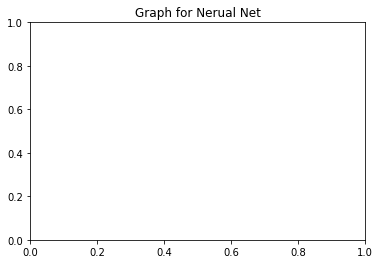

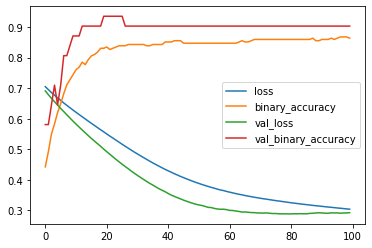

In [27]:
losses = pd.DataFrame(model.history.history)
plt.title("Graph for Nerual Net")
losses.plot()

In [28]:
y_test.shape

(30, 1)

In [33]:
y_pred = model.predict(X_test)
y_pred.shape

1/1 [==============================] - 0s 47ms/step


(30, 1)

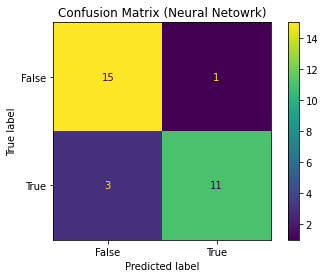

In [34]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred.round())

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.title("Confusion Matrix (Neural Netowrk)")

plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.92      0.79      0.85        14

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [32]:
accuracy_score(y_test, y_pred.round())

0.8666666666666667